In [ ]:
from google.colab import files
files.upload()


Saving rice-production.csv to rice-production.csv


{'rice-production.csv': b'Entity,Code,Year,"Crops - Rice, paddy - 27 - Production - 5510 - tonnes"\nAfghanistan,AFG,1961,319000\nAfghanistan,AFG,1962,319000\nAfghanistan,AFG,1963,319000\nAfghanistan,AFG,1964,380000\nAfghanistan,AFG,1965,380000\nAfghanistan,AFG,1966,337000\nAfghanistan,AFG,1967,396000\nAfghanistan,AFG,1968,402000\nAfghanistan,AFG,1969,407000\nAfghanistan,AFG,1970,366000\nAfghanistan,AFG,1971,350000\nAfghanistan,AFG,1972,400000\nAfghanistan,AFG,1973,420000\nAfghanistan,AFG,1974,420000\nAfghanistan,AFG,1975,435000\nAfghanistan,AFG,1976,448000\nAfghanistan,AFG,1977,400000\nAfghanistan,AFG,1978,428000\nAfghanistan,AFG,1979,439000\nAfghanistan,AFG,1980,415000\nAfghanistan,AFG,1981,390000\nAfghanistan,AFG,1982,364000\nAfghanistan,AFG,1983,350000\nAfghanistan,AFG,1984,334000\nAfghanistan,AFG,1985,317000\nAfghanistan,AFG,1986,336000\nAfghanistan,AFG,1987,324000\nAfghanistan,AFG,1988,343000\nAfghanistan,AFG,1989,320000\nAfghanistan,AFG,1990,333000\nAfghanistan,AFG,1991,335000\nA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importing data
path='rice-production.csv'
df = pd.read_csv(path)
df.columns = ['Region', 'Code','Year','Production']
df.head()

,Region,Code,Year,Production
0,Afghanistan,AFG,1961,319000
1,Afghanistan,AFG,1962,319000
2,Afghanistan,AFG,1963,319000
3,Afghanistan,AFG,1964,380000
4,Afghanistan,AFG,1965,380000


In [ ]:
#India=df[df['Region']=='India'].copy()
India=df[df['Code']=='BTN'].copy()
India['MA']=India['Production'].rolling(window=2).mean()
India.iat[0,-1]=India.iloc[0,-2]
India.iat[1,-1]=India.iloc[1,-2]
line=[]

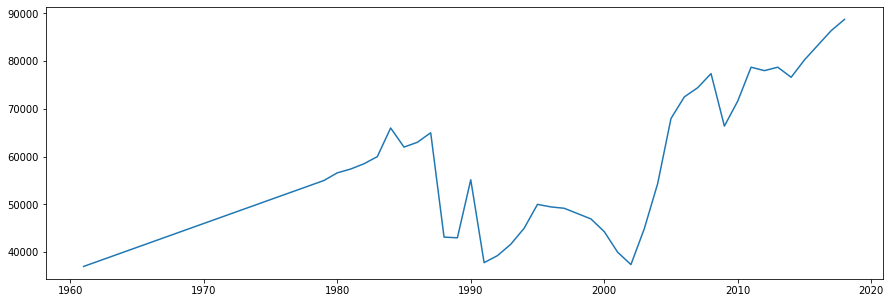

In [ ]:
#plotting the points in the datarame
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
ax.plot(India['Year'],India['Production'])

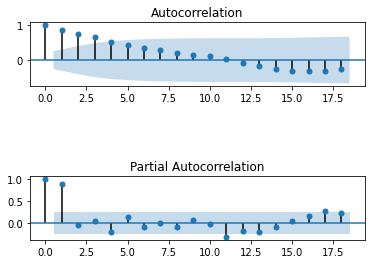

<Figure size 432x288 with 0 Axes>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(311)
plot_acf(India['Production'], ax=pyplot.gca())
pyplot.subplot(313)
plot_pacf(India['Production'], ax=pyplot.gca())
pyplot.show()
pyplot.savefig("ACF_PACF.eps")

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D2.MA   No. Observations:                   56
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -532.131
Method:                       css-mle   S.D. of innovations           3204.632
Date:                Fri, 05 Nov 2021   AIC                           1076.261
Time:                        15:37:21   BIC                           1088.413
Sample:                             2   HQIC                          1080.972
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.1456    227.300      0.111      0.912    -420.354     470.645
ar.L1.D2.MA    -0.0444      0.122     -0.366      0.716      -0.283       0.194
ar.L2.D2.MA    -0.6114      0.119     -5.129    

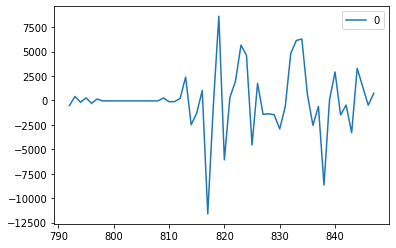

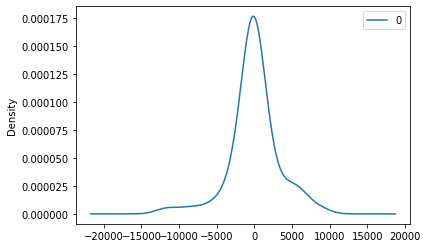

                  0
count     56.000000
mean      -0.110299
std     3234.128866
min   -11605.980406
25%     -615.477626
50%      -48.505303
75%      671.117643
max     8607.608812


In [ ]:
#series = India
# fit model
model = ARIMA(India['MA'], order=(4,2,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

Test RMSE: 5853.637


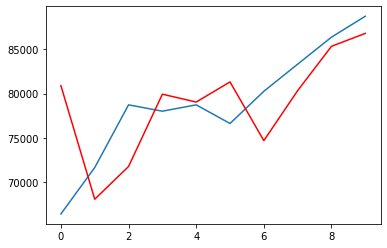

<Figure size 432x288 with 0 Axes>

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
X = India['MA'].values
size = int(len(X) * 0.83)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,2,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(India['Production'][-10:].values, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(India['Production'][-10:].values)
pyplot.plot(predictions, color='red')
pyplot.show()
pyplot.savefig("BTN_Test.eps")

In [ ]:
test_pred=[]
a=[x[0] for x in predictions]
print(a)
df_test = pd.DataFrame()
df_test['test']=a
df_test.to_csv('BTN_Test.csv')

[80897.63589126471, 68055.72681322324, 71757.35568251049, 79936.00539731863, 79047.81189923664, 81324.43058448374, 74682.41584864583, 80339.26482498377, 85352.0635758566, 86813.55031719513]


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(India['Production'][-10:].values,predictions)
print(r2)

0.12098623885604742


In [ ]:
def error_per(Y,y):
    """
    function to find the avg error percentage of the predicted data
    """
    error=0
    for i in range(len(Y)):
        error=error+abs((((Y[i]-y[i])/Y[i])*100))
    return error/len(Y)
print(error_per(India.iloc[-10:,-1:].values,predictions))

[6.19805073]


Test RMSE: 10129.386


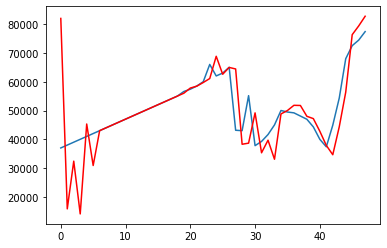

<Figure size 432x288 with 0 Axes>

In [ ]:
X = India['Production'].values
size = int(len(X) * 0.83)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(train)):
	model = ARIMA(history, order=(4,2,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = train[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(train, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(train)
pyplot.plot(predictions, color='red')
pyplot.show()
pyplot.savefig("BTN_Train.eps")

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(India.iloc[:-10,-2:-1].values,predictions)
print(r2)

0.0020634204608233064


In [ ]:
test_pred=[]
a=[x[0] for x in predictions]
print(a)

[81965.58899556946, 15845.837180985356, 32413.83847201657, 14095.217398696077, 45310.5770830964, 30904.458726663564, 43000.000000176304, 44000.00000089824, 45000.0, 46000.0, 47000.0000022883, 48000.0, 49000.0, 50000.0, 51000.0, 52000.0, 53000.0, 54000.0, 55000.0, 56000.00000183503, 57793.60322222167, 58450.928409488886, 59721.48666905691, 61102.040869196695, 68825.38304050149, 62582.15243435205, 64954.93136048545, 64425.380663748016, 38282.842675985696, 38668.15135215902, 49176.0602910211, 35317.00223599347, 39684.936461079764, 33077.63109394892, 48804.00937938405, 49996.309784236946, 51802.44558944428, 51745.53841505971, 47990.39380014593, 47180.681489385526, 42797.37632224709, 37884.81360862146, 34646.618027699806, 44337.83974196675, 56367.42068675138, 76326.09090280166, 79353.77663387186, 82727.79074241944]


In [ ]:
df_train = pd.DataFrame()
df_train['train']=a
df_train.to_csv('BTN_Train.csv')